# 퍼셉트론

퍼셉트론(perceptron)은 가장 오래되고 단순한 형태의 판별 함수 기반 예측 모형(discriminant function based predition model) 중 하나이다.

<img src="https://datascienceschool.net/upfiles/78cccb1e0a514566916eb656c85ea397.png" style="width:70%; margin: 0 auto 0 auto;">

<img src="https://datascienceschool.net/upfiles/41974f50e89249aebe059fb4d60310aa.png" style="width:70%; margin: 0 auto 0 auto;">

퍼셉트론은 입력 $x = (1, x_1, \cdots, x_m)$에 대해 1 또는 -1의 값을 가지는  $y$를 출력하는 비선형 함수이다. 1을 포함하는 입력 요소 $x_i$에 대해 가중치 $w_i$를 곱한 값이 판별 함수 $f(x)$가 된다.

$$ f(x) = w^T x $$

판별 함수 값이 활성화 함수(activation function) $a(z)$를 지나면 분류 결과를 나타내는 출력 $y$가 생성된다.

$$ y = a(f(x)) = a(w^Tx) $$

퍼셉트론은 활성화 함수로 다음과 같은 Heaviside step function 을 가진다.

$$ y = a(z) = \begin{cases} -1, & z < 0, \\ 1, & z \ge 0 \end{cases} $$

## 퍼셉트론 손실 함수

퍼셉트론은 독립 변수 $x$로부터 종속 변수 $y$를 예측하는 예측 모형이므로 예측 오차를 최소화하는 가중치 $w$를 계산해야 한다. 
가중치 $w$에 따라 달라지는 전체 예측 오차 $E$는 $i$번째 개별 데이터에 대한 손실 $L(\hat{y}_i, y_i)$의 합으로 표현할 수 있다.

$$
E(w) = \sum_i L(\hat{y}_i, y_i)
$$

손실 $L(\hat{y}_i, y_i)$는 실제값 $y$와 예측값 $\hat{y}$의 차이를 나타내는 함수이다. 
회귀 분석에서는 $L(\hat{y}, y) = -(\hat{y} - y)^2 $과 같은 손실함수를 많이 사용하였지만 퍼셉트론의 경우에는 다음과 같은 손실 함수를 사용한다.

$$
L(\hat{y}_i, y_i) = \max(0, -\hat{y}_iy_i)
$$

이 함수를 그대로 사용하면 미분이 어려우므로 같은 효과를 가지는 판별 함수 값 $w^Tx$를 사용해도 같은 최적점을 구할 수 있다.

$$
L = \max(0, -w^Tx_i y_i)
$$

$$
E(w) = \sum_i \max(0, -w^Tx_i y_i)
$$

이를 퍼셉트론 손실 함수(perceptron loss function)이라고 한다.
퍼셉트론 손실 함수는 다음과 같이 표현할 수도 있다.

$$
E(w) = - \sum_{i \in M} w^Tx_i y_i
$$

이 식에서 $M$은 오분류(missclassification)된 데이터의 집합이다.



## 가중치 계산

$E(w)$를 최소화하는 $w$를 찾기 위해 $E(w)$를 $w$로 미분하여 gradient를 구하면 다음과 같다.

$$
\dfrac{dE}{dw} = - \sum_{i \in M} x_i y_i
$$


gradient descent 방법을 사용하면 다음과 같이 $w$를 구할 수 있다.


$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} + \eta_k \sum_{i \in M} x_i y_i \\
\end{eqnarray}
$$

여기에서 $\eta$는 step size 또는 learning rate 이라고 부른다.


## SGD

퍼셉트론은 일반적인 gradient descent 방법이 아닌 SGD(Stochastic Gradient Descent) 최적화 방법을 사용한다.

SGD 최적화 방법은 정확한 gradient 인 $\dfrac{dE}{dw} = - \sum_{i \in M} x_i y_i$ 대신 일부 표본 데이터만 사용한 gradient의 추정치를 이용하는 방법이다.  gradient 추정에 사용하는 표본 데이터의 갯수를 minibatch size 라고 하는데 가장 퍼셉트론은 가장 극단적인 경우로 minibatch size = 1 을 사용한다. 즉, 한번에 하나의 오분류된 데이터만을 이용하여 가중치를 조정한다.

$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} + \eta_k  x_i y_i \\
\end{eqnarray}
$$

이 식에서 $i$는 매 회 임의의 표본을 선택한다.

## Scikit-Learn 의 퍼셉트론 구현

Scikit-Learn 에서는 두 가지의 퍼셉트론 클래스를 제공한다. 단순한 퍼셉트론 모형인 `Perceptron` 클래스와 좀 더 다양한 옵션 인수를 제공하는 `SGDClassifier` 클래스이다.

`SGDClassifier` 클래스에서 제공하는 인수 중 일부를 소개하면 다음과 같다.

* `loss` : ‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’,  ‘squared_epsilon_insensitive’
 * 손실 함수 

* `penalty` : ‘none’, ‘l2’, ‘l1’, or ‘elasticnet’
 * 정규화 조건

* `alpha`, `l1_ratio`
 * 정규화 가중치
 
* `max_iter` : 
 * 최적화를 위한 반복 횟수

* `eta0` : 
 * learning rate $\eta$

## Perceptron 실행 예

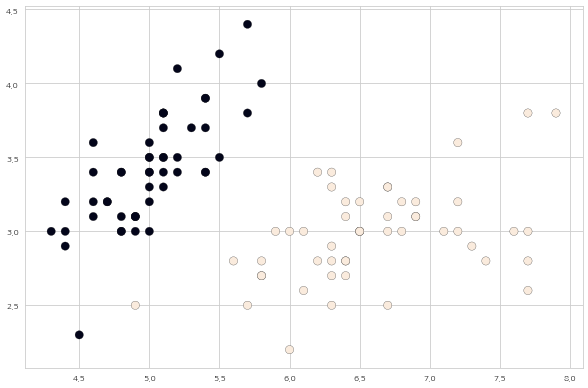

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k')
plt.show()

In [2]:
from sklearn.linear_model import Perceptron

def plot_perceptron(n):
    plt.figure(figsize=(12, 8), dpi=60)
    model = Perceptron(max_iter=n, eta0=0.1, random_state=1).fit(X, y)
    XX_min = X[:, 0].min() - 1; XX_max = X[:, 0].max() + 1;
    YY_min = X[:, 1].min() - 1; YY_max = X[:, 1].max() + 1;
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=2, edgecolor='k', c=y, cmap=cmap)
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()


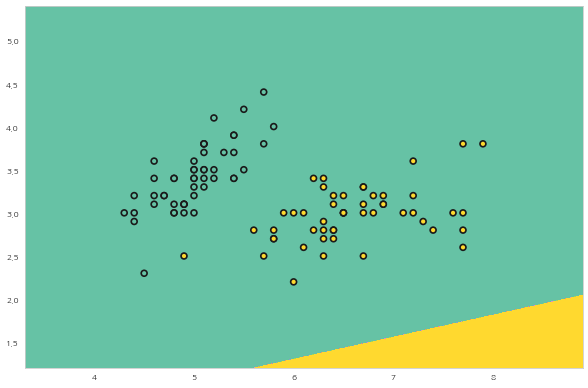

In [3]:
plot_perceptron(1)

In [5]:
from ipywidgets import widgets
widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1, max=100, step=1, value=1));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',))

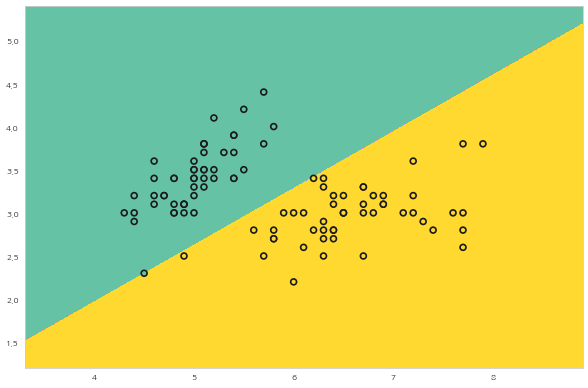

In [5]:
plot_perceptron(500)

In [6]:
from sklearn.metrics import confusion_matrix, classification_report

model = Perceptron(max_iter=500, eta0=0.1, random_state=1).fit(X, y)

In [7]:
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]])

## SGDClassifier 실행 예  

In [8]:
from sklearn.linear_model import SGDClassifier

def plot_sgd(n):
    plt.figure(figsize=(12, 8), dpi=60)
    model = SGDClassifier(loss="hinge", max_iter=n, random_state=1).fit(X, y)
    XX_min = X[:, 0].min() - 1; XX_max = X[:, 0].max() + 1;
    YY_min = X[:, 1].min() - 1; YY_max = X[:, 1].max() + 1;
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', linewidth=2, cmap=cmap)
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)    
    plt.grid(False)
    plt.show()

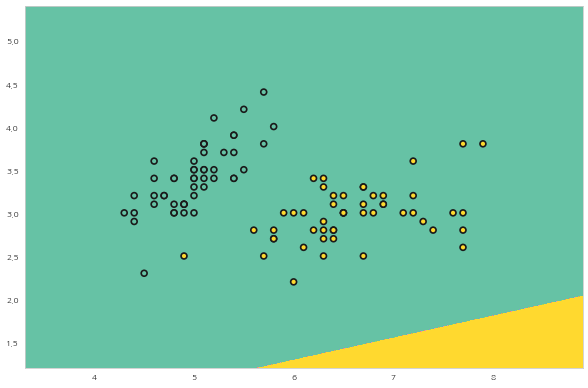

In [9]:
plot_sgd(1)

In [10]:
from ipywidgets import widgets
widgets.interact(plot_sgd, n=widgets.IntSlider(min=1,max=100,step=1,value=1));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',))

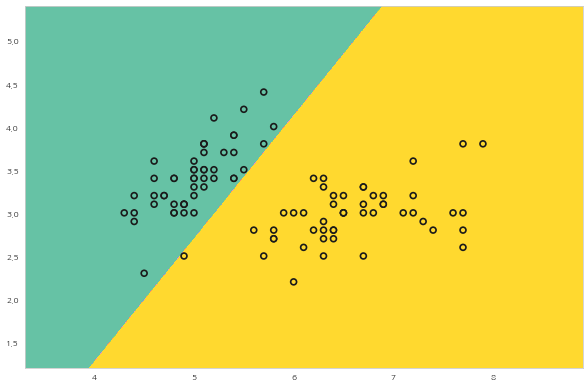

In [11]:
plot_sgd(1000)